## Association subtypes language (Story and Math)

In [25]:
import seaborn as sns
import os
import numpy as np
from scipy import stats, integrate
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline
sns.set(color_codes=True)

In [35]:
path_root = "/home/yassinebha/Drive/HCP"
data_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")

In [39]:
# Load pheno-subtype file
# Math
data_math = pd.read_csv(os.path.join(data_path,'math_pheno_subtype.csv'))
data_math_clean = data_math.dropna() # remove nan's
data_math_clean.head()

,ID,sub1,sub2,sub3,sub4,sub5,Age_in_Yrs,Handedness,BMI,Gender,ReadEng_Unadj,PicVocab_Unadj,ListSort_Unadj,FD_scrubbed_mean
0,HCP100206,0.270422,-0.227550,0.322095,0.150759,-0.169709,27,65,26.64,1,113.5460,119.89140,112.89,0.094210
1,HCP100307,-0.246650,0.119827,-0.359623,-0.059926,0.285418,27,95,22.96,2,111.0700,107.20000,108.06,0.110650
2,HCP100408,0.087266,0.035805,0.239133,0.070459,-0.314784,33,55,27.75,1,131.8100,134.24000,108.06,0.134142
3,HCP100610,-0.275647,0.156747,-0.367318,-0.061657,0.259543,27,85,36.91,1,141.3166,140.81510,117.39,0.184238
4,HCP101006,-0.055521,-0.124342,-0.109645,0.127028,0.223091,35,90,30.27,2,113.5374,95.42348,93.90,0.144401


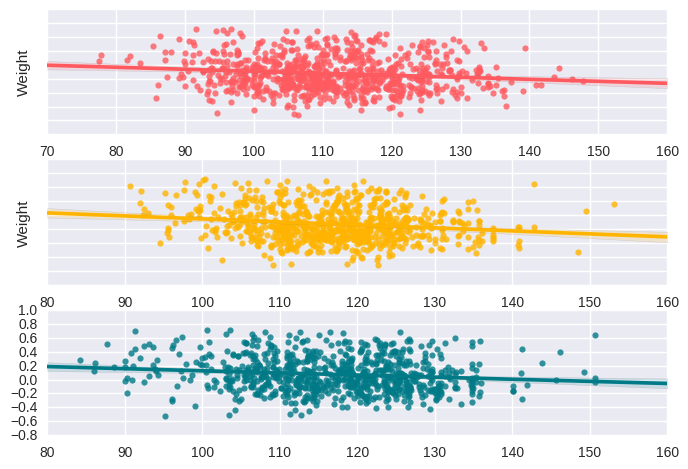

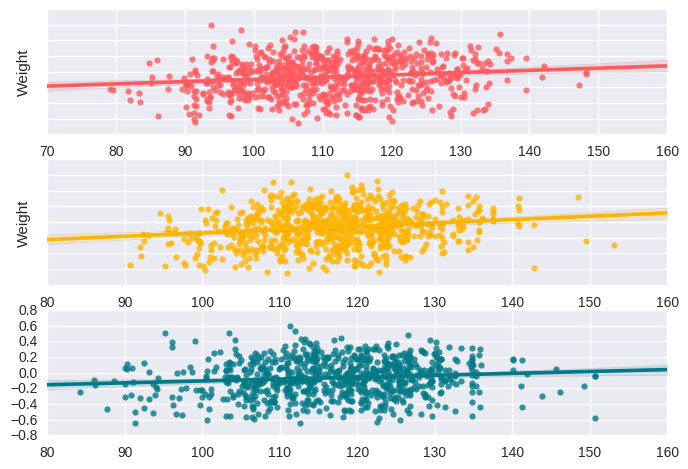

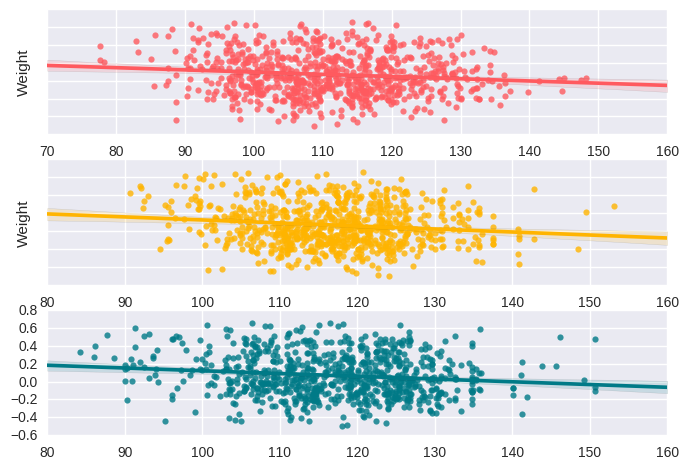

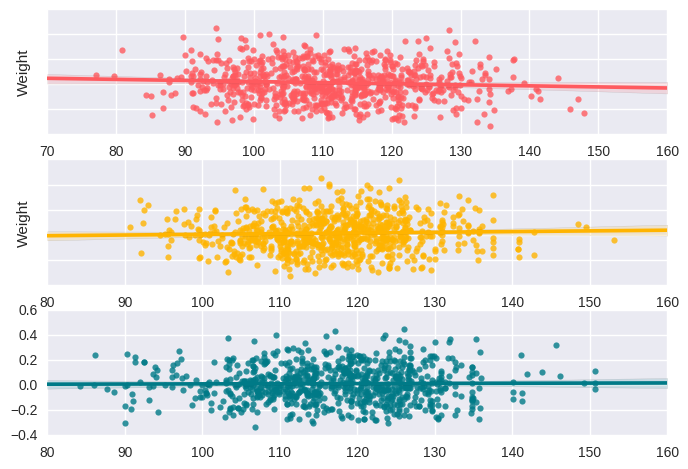

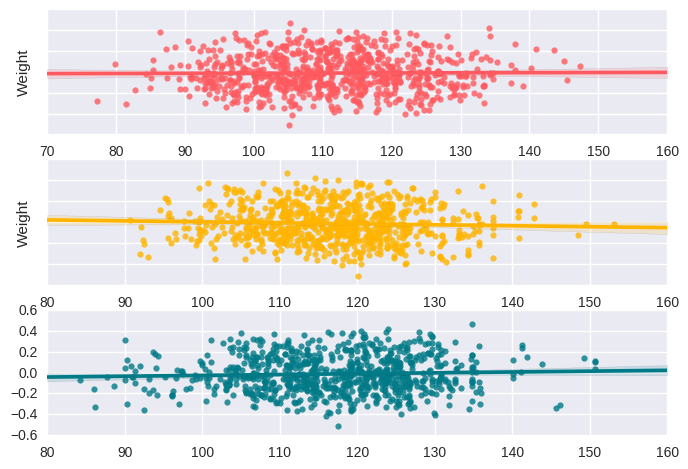

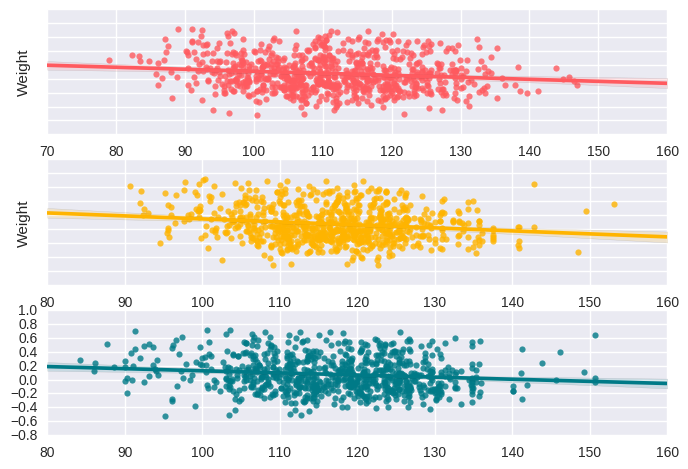

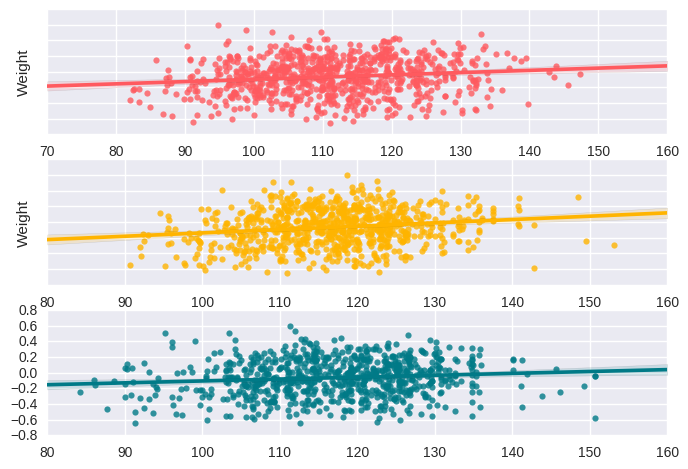

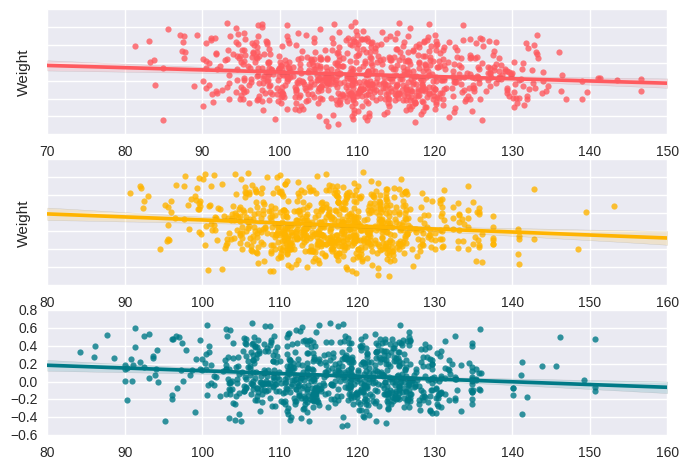

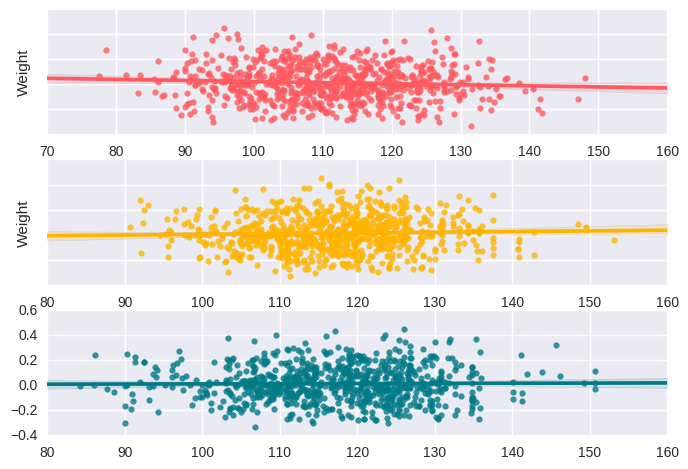

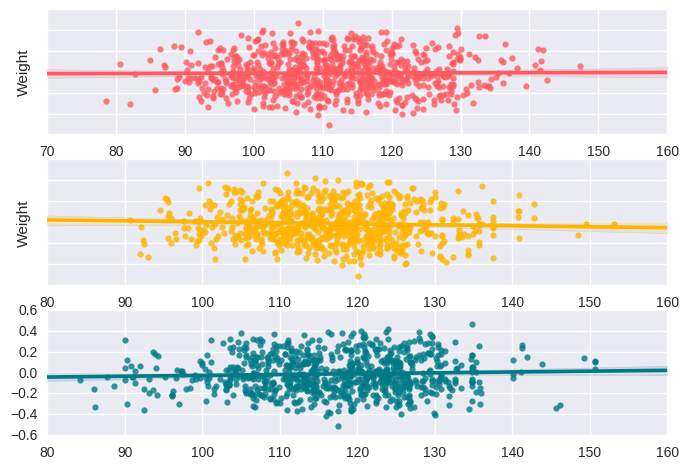

In [93]:
trial_list  = ['math' , 'story']
subt_list = ['sub1','sub2','sub3','sub4','sub5']
for trial in trial_list :
    data = pd.read_csv(os.path.join(data_path,'{}_pheno_subtype.csv'.format(trial)))
    data_clean = data.dropna() # remove nan's
    for subt in subt_list :
    
        fig = plt.figure()

        ax1 = fig.add_subplot(311)
        ax1 = sns.regplot(x="ListSort_Unadj", y=subt, data=data_math_clean,color="#ff5a5f",x_jitter= 4);
        ax1.set_ylabel('Weight')
        ax1.set_xlabel('')
        ax1.set(yticklabels=[])

        ax2 = fig.add_subplot(312)
        ax2= sns.regplot(x="PicVocab_Unadj", y=subt, data=data_math_clean,color="#ffb400");
        ax2.set_ylabel('Weight')
        ax2.set_xlabel('')
        ax2.set(yticklabels=[])

        ax3 = fig.add_subplot(313)
        ax3= sns.regplot(x="ReadEng_Unadj", y=subt, data=data_math_clean,color="#007a87");
        ax3.set_ylabel('')
        ax3.set_xlabel('')

        fig.savefig(os.path.join(data_path,"{}_pheno_association_{}.svg".format(trial,subt)))

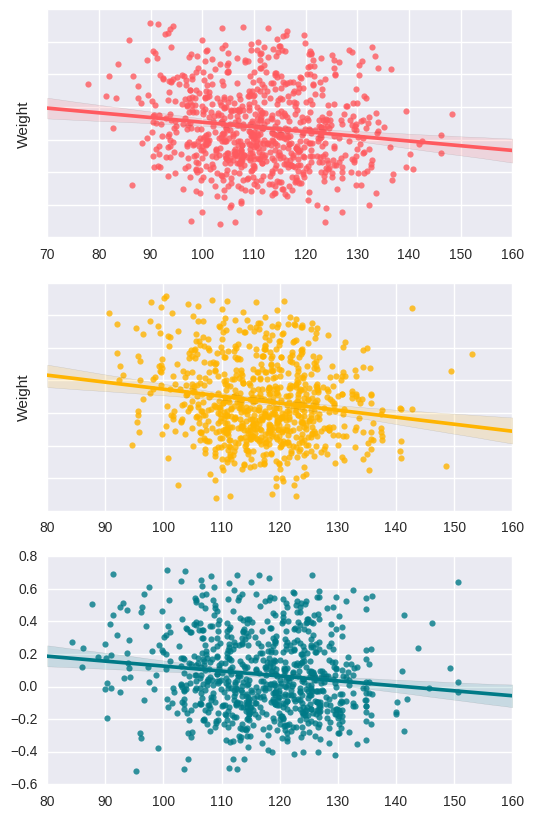

In [108]:
fig = plt.figure(figsize=(6,10))

ax1 = fig.add_subplot(311)
ax1 = sns.regplot(x="ListSort_Unadj", y="sub1", data=data_math_clean,color="#ff5a5f",x_jitter= 4);
ax1.set_ylabel('Weight')
ax1.set_xlabel('')
ax1.set(yticklabels=[])

ax2 = fig.add_subplot(312)
ax2= sns.regplot(x="PicVocab_Unadj", y="sub1", data=data_math_clean,color="#ffb400");
ax2.set_ylabel('Weight')
ax2.set_xlabel('')
ax2.set(yticklabels=[])

ax3 = fig.add_subplot(313)
ax3= sns.regplot(x="ReadEng_Unadj", y="sub1", data=data_math_clean,color="#007a87");
ax3.set_ylabel('')
ax3.set_xlabel('')

fig.savefig(os.path.join(data_path,"math_pheno_association_subt{}.svg".format('math')))

In [ ]:
########################### Change kernel to R #############################

In [1]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
#devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)

In [2]:
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

Loading required package: ggplot2


In [3]:
MyData_math <- read.csv(file="/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/math_r2.csv")
MyData_story <- read.csv(file="/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/story_r2.csv")
sprintf('Math R-squared table:')
MyData_math
sprintf('Story R-squared table:')
MyData_story

[1] "Math R-squared table:"

pheno,sub1,sub2,sub3,sub4,sub5
PicVocab_Unadj,0.03248545,0.03539872,0.008939249,0.03478213,0.010276055
ListSort_Unadj,0.02725906,0.03155059,0.009494469,0.03418382,0.008748025
ReadEng_Unadj,0.03682303,0.03884683,0.012797661,0.03389286,0.008986407


[1] "Story R-squared table:"

pheno,sub1,sub2,sub3,sub4,sub5
PicVocab_Unadj,0.05727871,0.06867612,0.03872336,0.02457047,0.006398797
ListSort_Unadj,0.03697380,0.04603497,0.02709801,0.03003229,0.003600421
ReadEng_Unadj,0.04166119,0.04356326,0.03701255,0.02433250,0.005820481


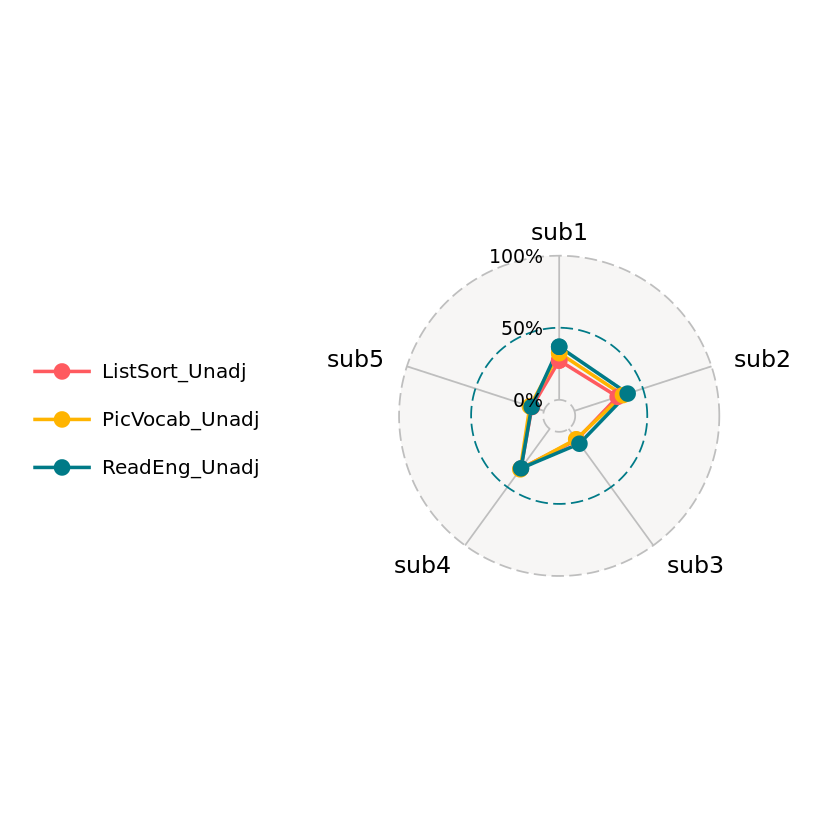

In [13]:
# plot R2 radar math
image_math=ggradar(MyData_math, grid.min = 0,
  grid.mid = 0.05, grid.max = 0.1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5,
                   group.line.width = 1,group.point.size = 4) +
  theme(legend.text = element_text(size = 12))
image_math

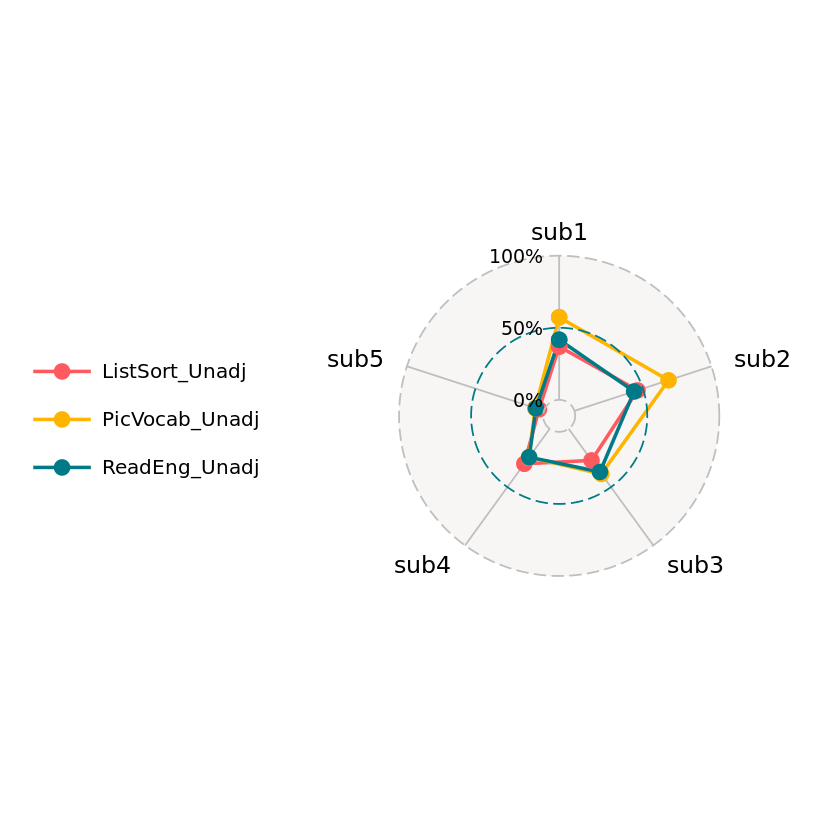

In [15]:
# plot R2 radar math
image_story=ggradar(MyData_story, grid.min = 0,
  grid.mid = 0.05, grid.max = 0.1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5,
                    group.line.width = 1,group.point.size = 4) +
  theme(legend.text = element_text(size = 12))
image_story

In [16]:
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")
setwd("/home/yassinebha/Drive/HCP/subtypes_scores/26-10-2016/subtype_5_spm_LANGUAGE_01-Feb-2017/associations/")

In [17]:
ggsave(file="math_R-squared.svg", plot=image_math, width=10, height=8)
ggsave(file="story_R-squared.svg", plot=image_story, width=10, height=8)